# Tarefa 1 - Flight Price

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [143]:
data = pd.read_csv('./datasets/flight_price.csv')

In [92]:
data

,serial_number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Data Treatment

In [93]:
data.drop(columns=['serial_number', 'flight'], inplace=True)

In [94]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [96]:
data.isna().any()

airline             False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [97]:
data.duplicated().sum()

2213

In [98]:
data.drop_duplicates(inplace=True)

In [99]:
data.duplicated().sum()

0

In [100]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [101]:
data.shape

(297940, 10)

In [102]:
airline = data['airline'].value_counts()
airline

airline
Vistara      126962
Air_India     80882
Indigo        42470
GO_FIRST      22979
AirAsia       16011
SpiceJet       8636
Name: count, dtype: int64

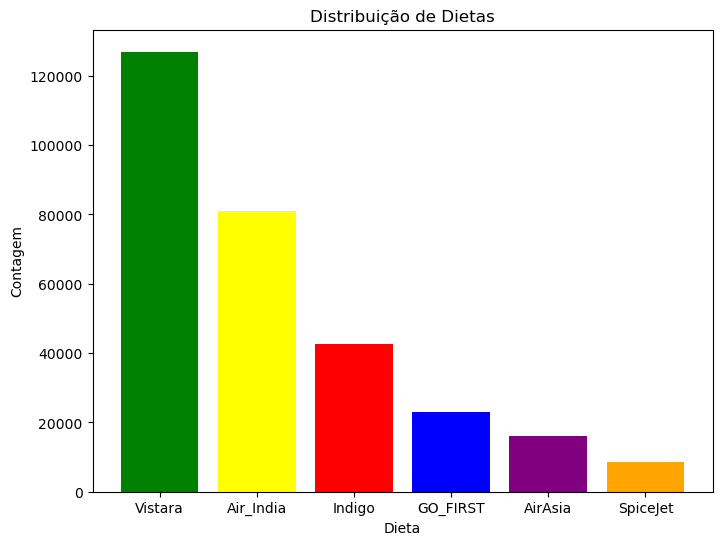

In [103]:
plt.figure(figsize=(8, 6))
plt.bar(airline.index, airline.values, color=['green', 'yellow', 'red', 'blue', 'purple', 'orange'])
plt.xlabel('Dieta')
plt.ylabel('Contagem')
plt.title('Distribuição de Dietas')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

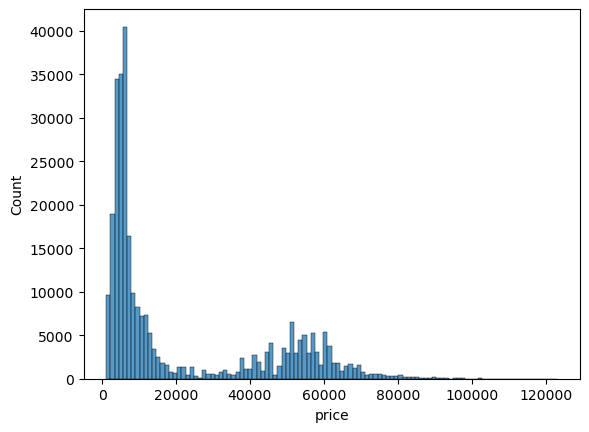

In [104]:
sns.histplot(data['price'])

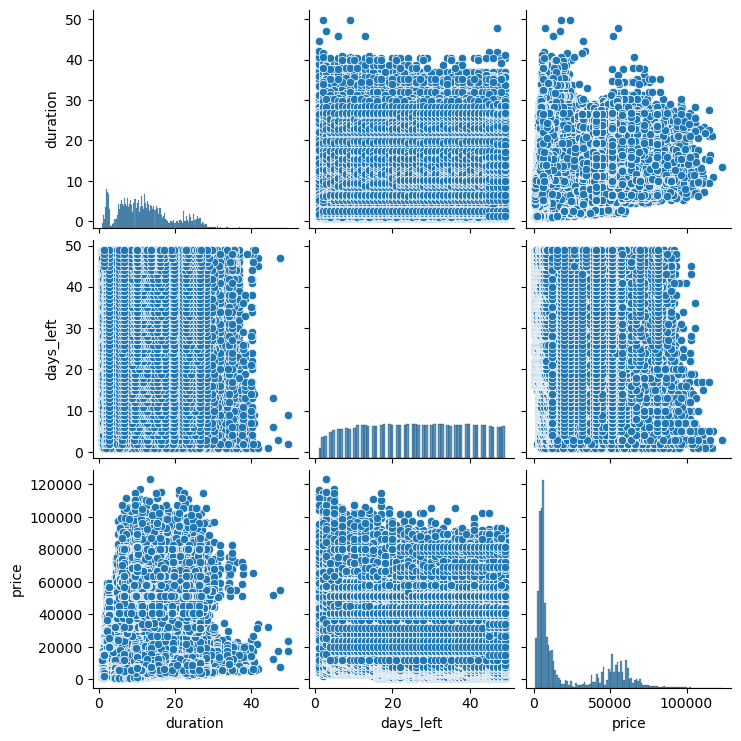

In [105]:
sns.pairplot(data)

<Axes: >

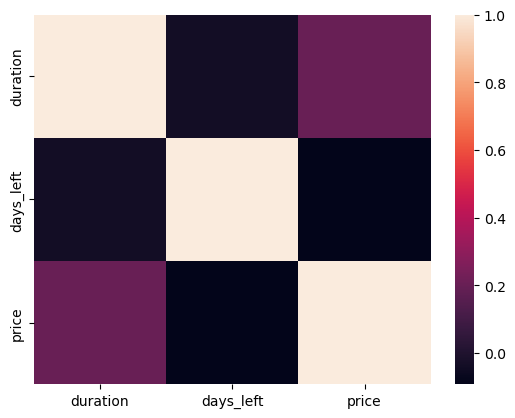

In [106]:
sns.heatmap(data.corr(numeric_only=True))

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  object 
 1   source_city       297940 non-null  object 
 2   departure_time    297940 non-null  object 
 3   stops             297940 non-null  object 
 4   arrival_time      297940 non-null  object 
 5   destination_city  297940 non-null  object 
 6   class             297940 non-null  object 
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.0+ MB


<Axes: xlabel='airline', ylabel='price'>

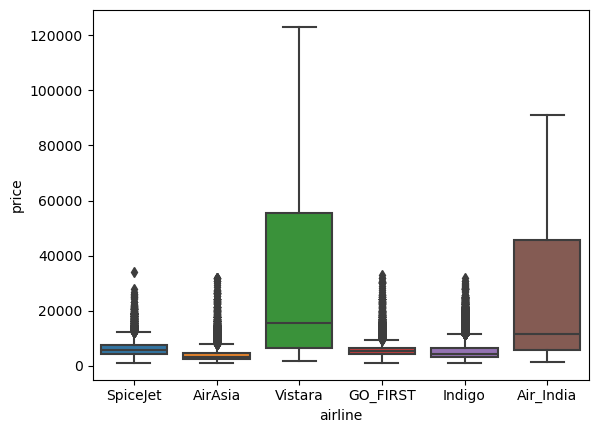

In [108]:
sns.boxplot(x='airline', y='price', data=data)

<Axes: xlabel='source_city', ylabel='price'>

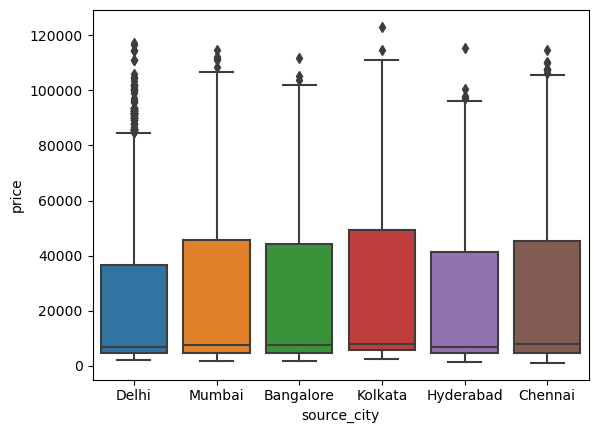

In [109]:
sns.boxplot(x='source_city', y='price', data=data)

<Axes: xlabel='departure_time', ylabel='price'>

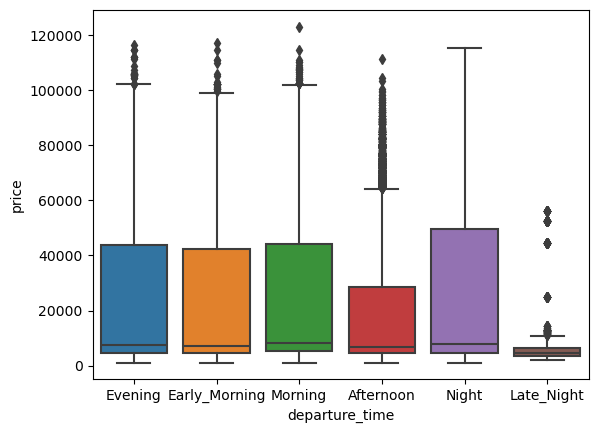

In [110]:
sns.boxplot(x='departure_time', y='price', data=data)

<Axes: xlabel='stops', ylabel='price'>

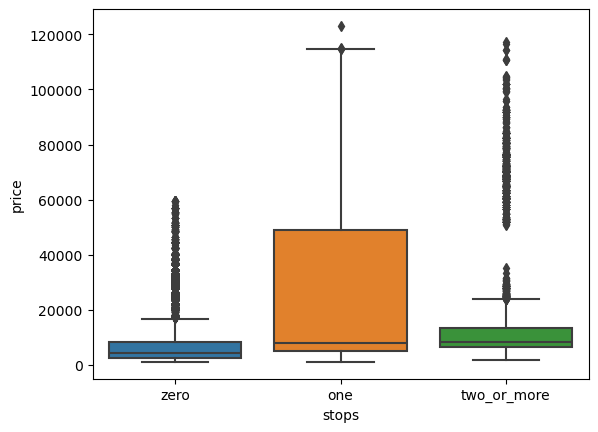

In [111]:
sns.boxplot(x='stops', y='price', data=data)

<Axes: xlabel='arrival_time', ylabel='price'>

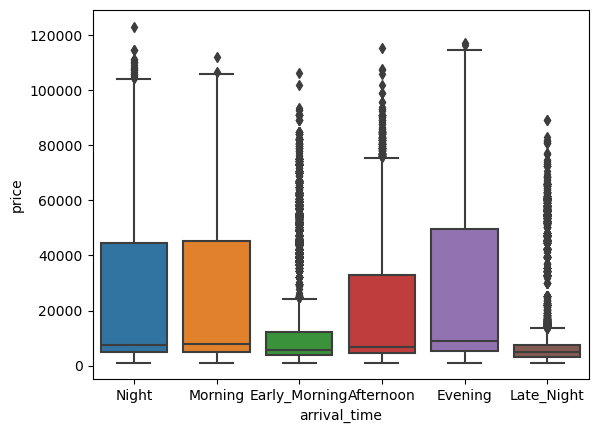

In [112]:
sns.boxplot(x='arrival_time', y='price', data=data)

<Axes: xlabel='destination_city', ylabel='price'>

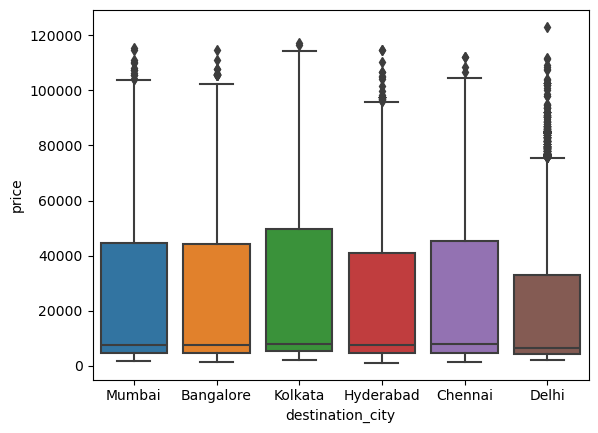

In [113]:
sns.boxplot(x='destination_city', y='price', data=data)

<Axes: xlabel='class', ylabel='price'>

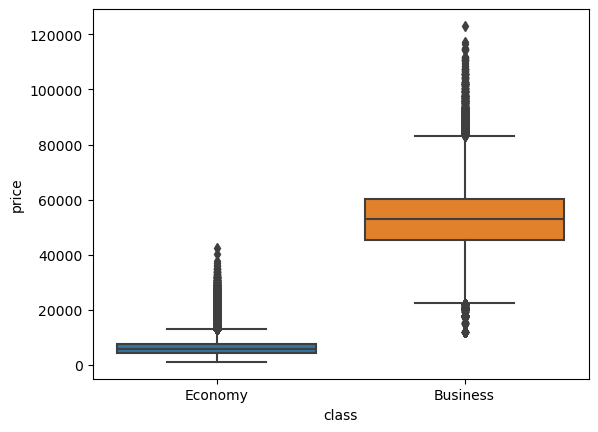

In [114]:
sns.boxplot(x='class', y='price', data=data)

### Transform the data

#### One-Hot Encoding

In [115]:
from sklearn.preprocessing import LabelBinarizer

features_to_encode = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']


lb = LabelBinarizer()
for f in features_to_encode:
    data_LB = lb.fit_transform(data[f])
    data_LB_df = pd.DataFrame(data_LB, columns=[f'{f}_{classe}' for classe in lb.classes_])

    data = pd.concat([data, data_LB_df], axis=1)
    data.dropna(inplace=True)
    
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [116]:
data.tail()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
286870,Vistara,Hyderabad,Night,one,Evening,Chennai,Business,19.75,34.0,51707.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
286871,Vistara,Hyderabad,Night,one,Night,Chennai,Business,23.67,34.0,51707.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
286872,Vistara,Hyderabad,Night,one,Night,Chennai,Business,26.17,34.0,51707.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
286873,Air_India,Hyderabad,Evening,one,Night,Chennai,Business,7.33,34.0,51595.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
286874,Air_India,Hyderabad,Morning,one,Evening,Chennai,Business,7.67,34.0,51595.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [117]:
data.isna().sum()

airline                         0
source_city                     0
departure_time                  0
stops                           0
arrival_time                    0
destination_city                0
class                           0
duration                        0
days_left                       0
price                           0
airline_AirAsia                 0
airline_Air_India               0
airline_GO_FIRST                0
airline_Indigo                  0
airline_SpiceJet                0
airline_Vistara                 0
source_city_Bangalore           0
source_city_Chennai             0
source_city_Delhi               0
source_city_Hyderabad           0
source_city_Kolkata             0
source_city_Mumbai              0
departure_time_Afternoon        0
departure_time_Early_Morning    0
departure_time_Evening          0
departure_time_Late_Night       0
departure_time_Morning          0
departure_time_Night            0
stops_one                       0
stops_two_or_m

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284662 entries, 0 to 286874
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   airline                       284662 non-null  object 
 1   source_city                   284662 non-null  object 
 2   departure_time                284662 non-null  object 
 3   stops                         284662 non-null  object 
 4   arrival_time                  284662 non-null  object 
 5   destination_city              284662 non-null  object 
 6   class                         284662 non-null  object 
 7   duration                      284662 non-null  float64
 8   days_left                     284662 non-null  float64
 9   price                         284662 non-null  float64
 10  airline_AirAsia               284662 non-null  float64
 11  airline_Air_India             284662 non-null  float64
 12  airline_GO_FIRST              284662 non-null  fl

In [119]:
data.drop(columns=features_to_encode, inplace=True)

#### Lable Encoding

In [120]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
data['class'] = lb.fit_transform(data['class'])

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284662 entries, 0 to 286874
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   class                         284662 non-null  int32  
 1   duration                      284662 non-null  float64
 2   days_left                     284662 non-null  float64
 3   price                         284662 non-null  float64
 4   airline_AirAsia               284662 non-null  float64
 5   airline_Air_India             284662 non-null  float64
 6   airline_GO_FIRST              284662 non-null  float64
 7   airline_Indigo                284662 non-null  float64
 8   airline_SpiceJet              284662 non-null  float64
 9   airline_Vistara               284662 non-null  float64
 10  source_city_Bangalore         284662 non-null  float64
 11  source_city_Chennai           284662 non-null  float64
 12  source_city_Delhi             284662 non-null  fl

### Test Train Split

In [122]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

#### Normalize

In [123]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [124]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [125]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=2023)

dtr.fit(X_train, y_train)
predictionDTR = dtr.predict(X_test)

In [126]:
print('Mean Absolute Error: ',end='')
print(mean_absolute_error(y_test, predictionDTR))

print('\nMean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=True))

print('\nRoot Mean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=False))

Mean Absolute Error: 2261.5164240414433

Mean Squared Error: 26246052.41203606

Root Mean Squared Error: 5123.0901233568065


### Multilayer Perceptron

#### Build Model

In [127]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [128]:
X_train.shape[1]

36

In [129]:
def build_model(activation = 'relu', learning_rate = 0.01, input_dim=36): # To get input_dim: X.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation=activation)) #output

    # Compile the model

    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']
    )
    return model

In [130]:
model = build_model()
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                592       
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [131]:
from sklearn.model_selection import KFold

optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

model = KerasRegressor(model = build_model, batch_size=32, epochs=20, validation_split = 0.2)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'neg_mean_absolute_error', verbose=1, refit=True)

In [132]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Epoch 1/20
4270/4270 [==============================] - 3s 666us/step - loss: 6460.4155 - mae: 6460.4155 - mse: 165430176.0000 - val_loss: 4080.3752 - val_mae: 4080.3752 - val_mse: 53041120.0000
Epoch 2/20
4270/4270 [==============================] - 3s 642us/step - loss: 3967.1326 - mae: 3967.1326 - mse: 48746196.0000 - val_loss: 4007.2029 - val_mae: 4007.2029 - val_mse: 50100344.0000
Epoch 3/20
4270/4270 [==============================] - 3s 669us/step - loss: 3959.0303 - mae: 3959.0303 - mse: 48481136.0000 - val_loss: 3996.4753 - val_mae: 3996.4753 - val_mse: 50576504.0000
Epoch 4/20
4270/4270 [==============================] - 3s 632us/step - loss: 3952.4543 - mae: 3952.4543 - mse: 48520112.0000 - val_loss: 4004.7625 - val_mae: 4004.7625 - val_mse: 51480032.0000
Epoch 5/20
4270/4270 [==============================] - 3s 657us/step - loss: 3956.5471 - mae: 3956.5471 - mse: 48579764.0000 - val_loss: 4027.3354 - val_mae: 4027.3354 - val_mse: 51068292.0000
Epoch 6/20
4270/4270 [=======

GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<function build_model at 0x000001CB08712680>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             scoring='neg_mean_absolute_error', verbose=1)

In [133]:
print('Best: %f using %s' % (grid_search.best_score_, grid_search.best_params_))

Best: -3689.226433 using {'optimizer': 'Adagrad'}


In [134]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x000001CB08712680>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)


In [135]:
best_mlp_model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/20
6672/6672 [==============================] - 5s 684us/step - loss: 6108.4253 - mae: 6108.4253 - mse: 147974592.0000 - val_loss: 3988.0315 - val_mae: 3988.0315 - val_mse: 50254244.0000
Epoch 2/20
6672/6672 [==============================] - 4s 663us/step - loss: 3963.2920 - mae: 3963.2920 - mse: 48733272.0000 - val_loss: 3975.4817 - val_mae: 3975.4817 - val_mse: 49949744.0000
Epoch 3/20
6672/6672 [==============================] - 5s 677us/step - loss: 3958.1306 - mae: 3958.1306 - mse: 48730976.0000 - val_loss: 4097.0483 - val_mae: 4097.0483 - val_mse: 52445656.0000
Epoch 4/20
6672/6672 [==============================] - 4s 674us/step - loss: 3953.9236 - mae: 3953.9236 - mse: 48719516.0000 - val_loss: 3973.4436 - val_mae: 3973.4436 - val_mse: 48905832.0000
Epoch 5/20
6672/6672 [==============================] - 4s 648us/step - loss: 3951.3369 - mae: 3951.3369 - mse: 48607940.0000 - val_loss: 3978.0906 - val_mae: 3978.0906 - val_mse: 48834628.0000
Epoch 6/20
6672/6672 [=======

KerasRegressor(
	model=<function build_model at 0x000001CB08712680>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

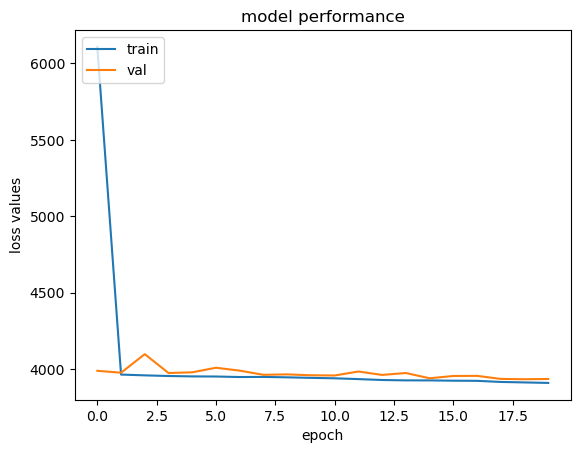

In [136]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss']) 
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [137]:
prediction = best_mlp_model.predict(X_test)

2224/2224 [==============================] - 1s 382us/step


In [138]:
print('Mean Absolute Error: ',end='')
print(mean_absolute_error(y_test, prediction))

print('\nMean Squared Error: ', end='')
print(mean_squared_error(y_test, prediction, squared=True))

print('\nRoot Mean Squared Error: ', end='')
print(mean_squared_error(y_test, prediction, squared=False))

Mean Absolute Error: 3934.5633331882887

Mean Squared Error: 49239595.68753037

Root Mean Squared Error: 7017.093108084741


In [139]:
prediction

array([[4111.4907],
       [4171.8887],
       [7942.9775],
       ...,
       [4539.4395],
       [4668.9644],
       [4662.26  ]], dtype=float32)

In [140]:
y_test

,price
101692,2201.0
81711,3318.0
153924,14218.0
151987,3015.0
231640,20684.0
...,...
115191,1714.0
241365,45693.0
57701,2074.0
102663,4224.0
